# Data understanding

- Analisi del dataset (apertura, analisi della tipologia di attributi ecc.)
- Analisi delle variabili

In [1]:
#installo robe
!pip install textblob
!pip install wordcloud
!pip install plotly
!pip install wordninja
!pip install pyspellchecker
!pip install kaleido
!pip install vaderSentiment
!pip install feel-it

  Using cached transformers-4.3.3-py3-none-any.whl (1.9 MB)
  Using cached tokenizers-0.10.3-cp39-cp39-win_amd64.whl (2.0 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.12.1
    Uninstalling tokenizers-0.12.1:
      Successfully uninstalled tokenizers-0.12.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.20.1
    Uninstalling transformers-4.20.1:
      Successfully uninstalled transformers-4.20.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 2.2.0 requires transformers<5.0.0,>=4.6.0, but you have transformers 4.3.3 which is incompatible.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
import string 
import seaborn as sns
import nltk
import pandas as pd
#pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import plotly.express as px
import plotly.express as px
import plotly.graph_objs as go



from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords 
from nltk import *

nltk.download('stopwords')
stop_words = set(stopwords.words('italian'))  
plt.rcParams['figure.figsize'] = [10, 8]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aliis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


TWEET ESTRATTI CON HASHTAG **"IMMUNI"** 

In [3]:
df = pd.read_csv('dati/tweet_Immuni_2020_2021.csv', parse_dates=['date'], low_memory=False) # #hashtag: Immuni
del df['Unnamed: 0'] #rimuovo la prima colonna*

TWEET ESTRATTI CON HASHTAG **"APPIMMUNI"** 

In [4]:
df2 = pd.read_csv('dati/tweet_AppImmuni_2020_2021.csv', parse_dates=['date'], low_memory=False) # #hashtag: AppImmuni
del df2['Unnamed: 0'] #rimuovo la prima colonna*

TWEET ESTRATTI CON HASHTAG **"IMMUNIAPP"** 

In [5]:
df3 = pd.read_csv('dati/tweet_ImmuniApp_2020_2021.csv', parse_dates=['date']) #hashtag: ImmuniApp
del df3['Unnamed: 0'] #rimuovo la prima colonna

## DATA UNDERSTANDING

1. **Dimensioni** (Righe e colonne)

In [6]:
print("Caratteristiche (righe, colonne) data set con tweet hashtag '#Immuni':", df.shape)
print("Caratteristiche (righe, colonne) data set con tweet hashtag '#AppImmuni':", df2.shape)
print("Caratteristiche (righe, colonne) data set con tweet hashtag '#ImmuniApp':", df3.shape)

Caratteristiche (righe, colonne) data set con tweet hashtag '#Immuni': (7032, 36)
Caratteristiche (righe, colonne) data set con tweet hashtag '#AppImmuni': (3789, 36)
Caratteristiche (righe, colonne) data set con tweet hashtag '#ImmuniApp': (2162, 36)


1. **Numero di utenti** (*user_id*,  codice univoco per ciascun utente)

In [7]:
#conto quanti utenti (identificati con uno user_id) ci sono nel primo dataset (quello con #immuni)
print("Numero UTENTI (User_id) dataset con tweet hashtag '#Immuni':", len(df['user_id'].unique()))
print("Numero UTENTI (User_id) dataset con tweet hashtag '#AppImmuni':", len(df2['user_id'].unique()))
print("Numero UTENTI (User_id) dataset con tweet hashtag '#ImmuniApp':", len(df3['user_id'].unique()))
#tot: 11720 utenti 

Numero UTENTI (User_id) dataset con tweet hashtag '#Immuni': 4706
Numero UTENTI (User_id) dataset con tweet hashtag '#AppImmuni': 978
Numero UTENTI (User_id) dataset con tweet hashtag '#ImmuniApp': 1033


2. **Tweets**

In [8]:
print("Numero TWEETS dataset con tweet hashtag '#Immuni':", len(df['tweet'].value_counts()))
print("Numero TWEETS dataset con tweet hashtag '#Appimmuni':", len(df2['tweet'].value_counts()))
print("Numero TWEETS dataset con tweet hashtag '#ImmuniApp':", len(df3['tweet'].value_counts()))

Numero TWEETS dataset con tweet hashtag '#Immuni': 6885
Numero TWEETS dataset con tweet hashtag '#Appimmuni': 1559
Numero TWEETS dataset con tweet hashtag '#ImmuniApp': 1602


3. Hashtags

In [9]:
print("Numero HASHTAGS dataset con tweet hashtag '#Immuni':", len(df['hashtags'].value_counts()))
print("Numero HASHTAGS dataset con tweet hashtag '#Appimmuni':", len(df2['hashtags'].value_counts()))
print("Numero HASHTAGS dataset con tweet hashtag '#ImmuniApp':", len(df3['hashtags'].value_counts()))

Numero HASHTAGS dataset con tweet hashtag '#Immuni': 1068
Numero HASHTAGS dataset con tweet hashtag '#Appimmuni': 833
Numero HASHTAGS dataset con tweet hashtag '#ImmuniApp': 796


# DATASET FINALE (df1 + df2)

### Unisco i due dataset

In [10]:
df_final = pd.concat([df, df2, df3],  ignore_index=True)
df_final.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1268331574891872256,1268331574891872256,2020-06-04 01:59:46 ora legale Europa occidentale,2020-06-04,01:59:46,200,266910319,appleforyou83,Theappleforyou,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1268331091909361665,1268331082698588160,2020-06-04 01:57:51 ora legale Europa occidentale,2020-06-04,01:57:51,200,1092893394,annafornasetti,안나 ★彡𓂀🫒,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1268331082698588162,1268331082698588160,2020-06-04 01:57:49 ora legale Europa occidentale,2020-06-04,01:57:49,200,1092893394,annafornasetti,안나 ★彡𓂀🫒,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1268330671438733314,1268296873883963392,2020-06-04 01:56:11 ora legale Europa occidentale,2020-06-04,01:56:11,200,1267957495324172288,aleessi4m,alessia ✨,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'DiegoFusaro', 'name': 'Diego...",NaN,NaN,NaN,NaN
4,1268329725967183873,1268329725967183872,2020-06-04 01:52:25 ora legale Europa occidentale,2020-06-04,01:52:25,200,1337280565,garboek,GabryKeegan,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


conto hashtags e menzioni

In [11]:
#conto gli hashtags
df_final['hashtag_count'] = df_final['tweet'].apply(lambda x: len([c for c in str(x) if c == '#']))

In [12]:
#conto le menzioni
df_final['ment_count'] = df_final['tweet'].apply(lambda x: len([c for c in str(x) if c == '@']))

## DATA CLEANING

Elimino le colonne inutili o con valori nulli da entrambi i df

In [13]:
df_final = df_final.drop(['id','time', "retweet_date", "translate", "created_at", "conversation_id", "trans_src", "trans_dest","link", "near", "geo", "source", "user_rt_id","user_rt", "retweet_id", "place", "thumbnail", "video", "language", "photos" , "timezone", "cashtags", "urls", "retweet", "quote_url"], axis=1)

### Pulizia dei tweet:
- elimino i duolicati
- li ripulisco utilizzando le er

In [14]:
#elimino i tweet duplicati
df_final = df_final.drop_duplicates('tweet') # tweet doppi = 3.199
df_final

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,hashtag_count,ment_count
0,2020-06-04,266910319,appleforyou83,Theappleforyou,Immuni:l’app per contenere i contagi del Covid...,[],0,0,0,[],[],0,0
1,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,"Si valà Piergianfranco, lotta per la tua priva...",[],1,0,0,[],[],0,0
2,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,“non scaricate l’app immuni serve al governo p...,[],1,0,4,[],[],0,0
3,2020-06-04,1267957495324172288,aleessi4m,alessia ✨,"@DiegoFusaro Scusa un attimo, ma se tieni così...",[],0,0,1,[],"[{'screen_name': 'DiegoFusaro', 'name': 'Diego...",0,1
4,2020-06-04,1337280565,garboek,GabryKeegan,Qualcuno adotti il bambino dell'#appimmuni,[],0,0,2,['appimmuni'],[],1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12978,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,"@GiorgiaMeloni @BelpietroTweet Giusto, rendiam...","[{'screen_name': 'immuni_app', 'name': 'immuni...",0,0,0,"['immuniapp', 'contattostretto', 'positivo']","[{'screen_name': 'GiorgiaMeloni', 'name': 'Gio...",3,3
12979,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,"Update: #GreenPass, #ZoneAColori, #restrizioni...",[],0,0,0,"['greenpass', 'zoneacolori', 'restrizioni', 'l...",[],15,0
12980,2021-08-08,1006624848272154624,grossofanken,grossofanken,Ma un bel #cashback ad ogni esibizione del #Gr...,[],1,0,0,"['cashback', 'greenpassobbligatorio', 'immunia...",[],3,0
12981,2021-08-29,1260497008986652678,lorech__,Lore,@Dino53084186 @sbonaccini Se nn vede la differ...,[],3,0,3,[],"[{'screen_name': 'Dino53084186', 'name': 'Dino...",0,2


#### Trasformo i tweet eliminando caratteri speciali, doppi spazi ecc. 

In [15]:
import pandas as pd
import re
import gensim
from nltk.stem import WordNetLemmatizer

punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'         # define a string of punctuation symbols
def remove_links(tweet):
    """Takes a string and removes web links from it"""
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet

def remove_users(tweet):
    """Takes a string and removes retweet and @user information"""
   # tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove re-tweet
    tweet = re.sub('@', '', tweet)  # remove tweeted at
    return tweet

def remove_hashtags(tweet):
    """Takes a string and removes any hash tags"""
    tweet = re.sub('#', ' ', tweet)  # remove hash tags
    return tweet

def remove_av(tweet):
    """Takes a string and removes AUDIO/VIDEO tags or labels"""
    tweet = re.sub('VIDEO:', '', tweet)  # remove 'VIDEO:' from start of tweet
    tweet = re.sub('AUDIO:', '', tweet)  # remove 'AUDIO:' from start of tweet
    return tweet

def tokenize(tweet):
    """Returns tokenized representation of words in lemma form excluding stopwords"""
    result = []
    for token in gensim.utils.simple_preprocess(tweet):
        if token not in gensim.parsing.preprocessing.STOPWORDS \
                and len(token) > 2:  # drops words with less than 3 characters
            result.append(lemmatize(token))
    return result

def lemmatize(token):
    """Returns lemmatization of a token"""
    return WordNetLemmatizer().lemmatize(token, pos='v')

def pulizia_tweet(tweet):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet_token_list = tokenize(tweet)  # apply lemmatization and tokenization
    tweet = ' '.join(tweet_token_list)
    #tweet = tweet.strip(stop_words)
    return tweet


In [16]:
df_final['tweet'] = [pulizia_tweet(tweet) for tweet in df_final.tweet]


In [17]:
#df_final['tweet'].astype(str).strip(stop_words)
df_final['tweet'] = df_final['tweet'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in stop_words))

In [18]:
df_final.tail(6)

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,hashtag_count,ment_count
12977,2021-07-12,1035920142843215874,capobianco2005c,Michele Capobianco,zziagenio dire bisogno vera squadra coesa dete...,[],0,0,1,"['squadra', 'pandemia', 'immuniapp']","[{'screen_name': 'Zziagenio78', 'name': 'Genio...",3,1
12978,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,giorgiameloni belpietrotweet giusto rendiamo o...,"[{'screen_name': 'immuni_app', 'name': 'immuni...",0,0,0,"['immuniapp', 'contattostretto', 'positivo']","[{'screen_name': 'GiorgiaMeloni', 'name': 'Gio...",3,3
12979,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,update greenpass zoneacolori restrizioni lockd...,[],0,0,0,"['greenpass', 'zoneacolori', 'restrizioni', 'l...",[],15,0
12980,2021-08-08,1006624848272154624,grossofanken,grossofanken,bel cashback ogni esibizione scaricato esclusi...,[],1,0,0,"['cashback', 'greenpassobbligatorio', 'immunia...",[],3,0
12981,2021-08-29,1260497008986652678,lorech__,Lore,dino sbonaccini vede differenza problema grave...,[],3,0,3,[],"[{'screen_name': 'Dino53084186', 'name': 'Dino...",0,2
12982,2021-12-31,866679978,fede2_4,Shadow,enricoletta cappellini serviva lockdownsubito ...,[],1,0,0,"['lockdownsubito', 'omicron', 'obbligovaccinal...","[{'screen_name': 'EnricoLetta', 'name': 'Enric...",5,2


In [19]:
df_final['tweet']

0             immuni app contenere contagi covid fase vers
1        valà piergianfranco lotta privacy chissà azion...
2        scaricate app immuni serve governo tracciarci ...
3        diegofusaro scusa attimo tieni così tanto priv...
4                          qualcuno adotti bambino appimmu
                               ...                        
12978    giorgiameloni belpietrotweet giusto rendiamo o...
12979    update greenpass zoneacolori restrizioni lockd...
12980    bel cashback ogni esibizione scaricato esclusi...
12981    dino sbonaccini vede differenza problema grave...
12982    enricoletta cappellini serviva lockdownsubito ...
Name: tweet, Length: 9784, dtype: object

In [20]:
df_final.isna().sum()

date              0
user_id           0
username          0
name              3
tweet             0
mentions          0
replies_count     0
retweets_count    0
likes_count       0
hashtags          0
reply_to          0
hashtag_count     0
ment_count        0
dtype: int64

Conto gli hashtags e le menzioni

### Caratteristiche df finale

1. **Dimensioni** (righe e colonne)

In [21]:
print("Nuove dimensioni del dataset dopo l'unione: \n") 
print('COLONNE: ', df_final.columns, '\n')
print('RIGHE E COLONNE: ', df_final.shape)

Nuove dimensioni del dataset dopo l'unione: 

COLONNE:  Index(['date', 'user_id', 'username', 'name', 'tweet', 'mentions',
       'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'reply_to', 'hashtag_count', 'ment_count'],
      dtype='object') 

RIGHE E COLONNE:  (9784, 13)


In [22]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9784 entries, 0 to 12982
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            9784 non-null   datetime64[ns]
 1   user_id         9784 non-null   int64         
 2   username        9784 non-null   object        
 3   name            9781 non-null   object        
 4   tweet           9784 non-null   object        
 5   mentions        9784 non-null   object        
 6   replies_count   9784 non-null   int64         
 7   retweets_count  9784 non-null   int64         
 8   likes_count     9784 non-null   int64         
 9   hashtags        9784 non-null   object        
 10  reply_to        9784 non-null   object        
 11  hashtag_count   9784 non-null   int64         
 12  ment_count      9784 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 1.0+ MB


2: **Numero Utenti** (user_id)

In [23]:
#conto quanti utenti (identificati con uno user_id) ci sono nel dataset finale
print("Numero UTENTI dataset finale (#Immuni + #AppImmuni): ", len(df_final['username'].unique()))

#tot: 10285 utenti 

Numero UTENTI dataset finale (#Immuni + #AppImmuni):  6146


3. **Tweets**

In [24]:
#conto quanti tweet ci sono nel dataset finale
print("Numero TWEETS dataset finale (#Immuni + #AppImmuni): ", len(df_final['tweet'].value_counts()))

Numero TWEETS dataset finale (#Immuni + #AppImmuni):  9510


4. **Hashtags**

In [25]:
#conto quanti utenti (identificati con uno user_id) ci sono nel dataset finale
print("Numero HASHTAGS dataset finale (#Immuni + #AppImmuni): ", len(df_final['hashtags'].unique()))

#tot: 10285 utenti 

Numero HASHTAGS dataset finale (#Immuni + #AppImmuni):  2514


5. **Statistiche**

In [26]:
df_final.describe()

,user_id,replies_count,retweets_count,likes_count,hashtag_count,ment_count
count,9.784000e+03,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000
mean,3.441485e+17,0.981603,1.199101,5.888798,1.559485,1.313778
std,5.189202e+17,6.569584,10.370920,65.790824,2.922443,2.379954
min,1.122600e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.536033e+08,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.258511e+09,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.031915e+17,1.000000,0.000000,2.000000,2.000000,2.000000
max,1.459849e+18,334.000000,597.000000,4141.000000,20.000000,50.000000


estraggo 
- i 10 tweets più retweettati che si presume siano quelli andati amggiormente virali su twitter
- i 10 tweets con più likes
- i 10 tweets più menzioni/risposte

In [27]:
#estraggo i 10 tweets puù retweettati che si presume siano quelli andati amggiormente virali su twitter
df_final.sort_values(by='likes_count', ascending=False)[['tweet', 'date', 'name', 'hashtags', 'likes_count']].head(n=15)

,tweet,date,name,hashtags,likes_count
11920,comunque download app torcia immuni immuniapp,2020-07-10,Le frasi di Osho,['immuniapp'],4141
476,giorgia meloni invita italiani scaricare app i...,2020-06-24,Cathy La Torre 🏳️‍🌈,[],3624
5041,tenerezza sola quando controllo app immuni,2021-04-13,stefania pinna,[],1474
474,trovo assolutamente irresponsabile atteggiamen...,2020-06-24,Gregorio de Falco,[],1019
1286,uso app immuni comunicato codice tre volte fun...,2020-07-29,Matt Novells,[],931
5095,alimentare app immuni potremmo usare energia c...,2021-04-18,Carlo Calenda,[],920
4310,dopo mesi arrivata notifica app immuni dice ch...,2021-02-21,Dorian Gray,[],758
5387,credo molto vaccini vera svolta uscire pandemi...,2021-05-10,Fabio Di Iorio,[],689
5609,amici consiglio far fare green pass stessa fin...,2021-06-09,Cambiacasacca,[],641
5112,pass vaccinale potremmo usare app immu,2021-04-18,Antonio Polito,[],635


In [28]:
#estraggo i 10 tweets puù retweettati che si presume siano quelli andati amggiormente virali su twitter
df_final.sort_values(by='retweets_count', ascending=False)[['tweet', 'date', 'name', 'hashtags', 'retweets_count']].head(n=15)

,tweet,date,name,hashtags,retweets_count
11920,comunque download app torcia immuni immuniapp,2020-07-10,Le frasi di Osho,['immuniapp'],597
476,giorgia meloni invita italiani scaricare app i...,2020-06-24,Cathy La Torre 🏳️‍🌈,[],502
9730,quindi promotori propaganda app immuni scarica...,2020-10-05,Bonnie,"['lorenzin', 'problemaaltelefono', 'appimmuni']",260
474,trovo assolutamente irresponsabile atteggiamen...,2020-06-24,Gregorio de Falco,[],178
4571,app immuni funzionato piano vaccinale mai prep...,2021-03-12,𝓞𝓫𝓵𝓸𝓶𝓸𝓿,[],144
2121,immuni oggi milioni persone scaricato app down...,2020-09-25,alessandro longo,[],132
5609,amici consiglio far fare green pass stessa fin...,2021-06-09,Cambiacasacca,[],125
4455,immuni ragazzi dimentichiamo fantastica app ga...,2021-03-05,Cambiacasacca,[],115
7557,appimmuni potrà funzionare tampone dipendente ...,2020-06-05,Nino Cartabellotta,"['appimmuni', 'tampone', 'iostocongimbe', 'cov...",114
1688,app immuni scaricata qualcuno confermate solo ...,2020-08-23,Federica 🇮🇹🇮🇹🇮🇹,"['immuni', 'mascherina', 'vaccino', 'microchip...",106


In [29]:
#estraggo i 10 tweets puù retweettati che si presume siano quelli andati amggiormente virali su twitter
df_final.sort_values(by='replies_count', ascending=False)[['tweet', 'date', 'name', 'hashtags', 'replies_count']].head(n=15)

,tweet,date,name,hashtags,replies_count
9922,voglio cedere dati scatola chiusa privacy cosa...,2020-10-10,Daniela Santanchè,"['privacy', 'appimmuni', 'covid19']",334
4798,ancora app immuni telefono,2021-03-24,sette e trentuno 🏳️‍🌈,[],266
840,qualcuno dirmi fine fatto app immuni sente par...,2020-07-06,ninibisagno,[],143
1688,app immuni scaricata qualcuno confermate solo ...,2020-08-23,Federica 🇮🇹🇮🇹🇮🇹,"['immuni', 'mascherina', 'vaccino', 'microchip...",131
3238,immuni fine fatto app spia,2020-11-21,me-gon. 🖤💙,[],126
5112,pass vaccinale potremmo usare app immu,2021-04-18,Antonio Polito,[],123
11920,comunque download app torcia immuni immuniapp,2020-07-10,Le frasi di Osho,['immuniapp'],115
5014,app immuni passaporto vaccinale idea colao,2021-04-13,Corriere della Sera,[],113
893,accusa ricciardi pochi hano scaricato app immu...,2020-07-08,Globalist.it,[],103
3910,twett brevissimo app immuni fine fatto,2021-01-22,il bianconero,[],97


È interessante come i primi due tweets più virali siano li stessi e sono entrambi di carattere negativo, il primo scherza sui download dell'app immuni, che sono minori persino dei download della torcia e il secondo è sempre ironico e riguada la politica.

Imoltre, uno dei tweet più popolari in termini di likes, rt e mezioni e quello di Matteo Salvini, il quale mostra lui stesso perplessità sull'app non fidandosi di cedere i dati

Ordinando i tweet in base al numero di risposte si nota come siano li stessi politici (come Daniele Santanché e Matteo Salvini) a scribere tweet perplessi sul tema, segno della scarsa organizzazione politica 

### Numero di Likes, menzioni e rt

In [30]:
df_final.head(2)

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,hashtag_count,ment_count
0,2020-06-04,266910319,appleforyou83,Theappleforyou,immuni app contenere contagi covid fase vers,[],0,0,0,[],[],0,0
1,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,valà piergianfranco lotta privacy chissà azion...,[],1,0,0,[],[],0,0


In [31]:
#istogramma che rappresenta il numero di hashtags utilizzati e di menzioni contenute in ciascun tweet

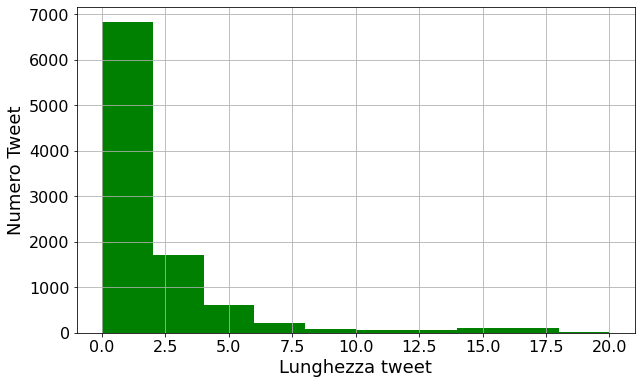

In [32]:
fig = plt.figure(figsize=(10, 6))
df_final['hashtag_count'].hist(color = 'green')
#df['token_lunghezza_media'].value_counts().plot(kind='hist', color = '#e7298a')
plt.ylabel("Numero Tweet", fontsize=18)
plt.xlabel('Lunghezza tweet', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("img/ment:count.png")

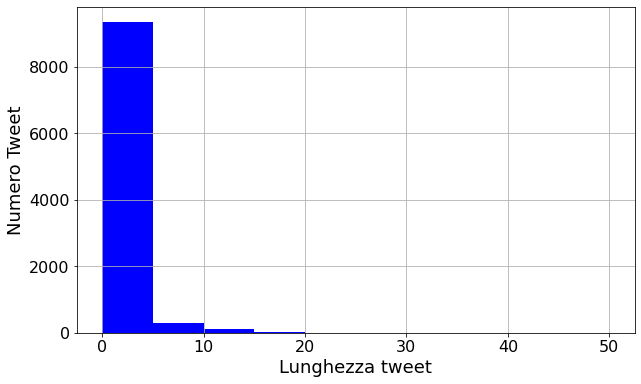

In [33]:
fig = plt.figure(figsize=(10, 6))
df_final['ment_count'].hist(color = 'blue')
#df['token_lunghezza_media'].value_counts().plot(kind='hist', color = '#e7298a')
plt.ylabel("Numero Tweet", fontsize=18)
plt.xlabel('Lunghezza tweet', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("img/hashtags_count.png")

In [34]:
print("Valore massimo dei likes e' ", df_final['likes_count'].max())
print("Valore minimo dei likes e' ", df_final['likes_count'].min())

Valore massimo dei likes e'  4141
Valore minimo dei likes e'  0


In [35]:
print("Valore massimo dei rt e' ", df_final['retweets_count'].max())
print("Valore minimo dei rt e' ", df_final['retweets_count'].min())

Valore massimo dei rt e'  597
Valore minimo dei rt e'  0


In [36]:
tweet_likes  = df_final[df_final['likes_count'] >= 15]['tweet'].apply(lambda x: len(x) - len(' '))
tweet_rt = df_final[df_final['retweets_count'] >= 10]['tweet'].apply(lambda x: len(x) - len(' '))
tweet_reply = df_final[df_final['replies_count'] >= 10]['tweet'].apply(lambda x: len(x) - len(' '))

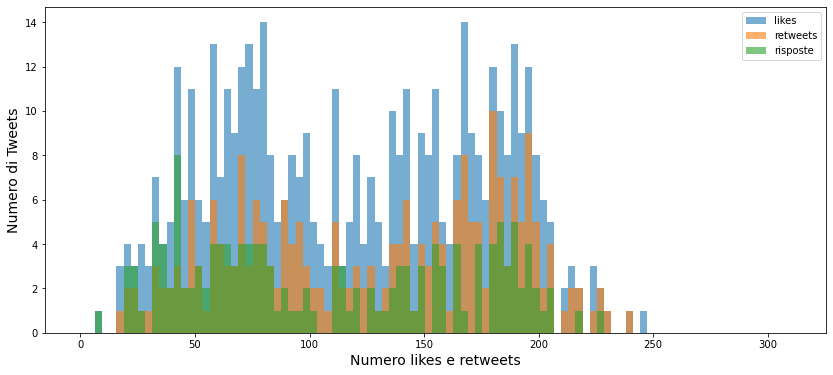

In [37]:
bins_ = np.linspace(0, 310, 100)
plt.figure(figsize=(14,6))
plt.hist(tweet_likes, bins= bins_, alpha = 0.6, label = 'likes')
plt.hist(tweet_rt, bins=bins_, alpha = 0.6, label = 'retweets')
plt.hist(tweet_reply, bins=bins_, alpha = 0.6, label = 'risposte')
plt.xlabel('Numero likes e retweets', fontsize=14)
plt.ylabel('Numero di Tweets', fontsize=14)
plt.savefig('likes_rt_mentions_df_final.jpg')
plt.legend()

In [38]:
df_final.sort_values(by='date', ascending=True)[['tweet', 'date', 'user_id', 'hashtags', 'retweets_count']].head(n=10)

,tweet,date,user_id,hashtags,retweets_count
7049,ecco seconda parte progress altri esperti spie...,2020-06-01,855102985541758978,"['progress', 'appimmuni']",0
7100,coronavirus appimmuni online,2020-06-01,329607652,"['coronavirus', 'appimmuni']",0
7101,immuniapp finalmente pronta app immuni servirà...,2020-06-01,78901034,"['immuniapp', 'immuni', 'coronavirus', '1giugn...",0
7102,buon senso senso civico appimmuni coviditalia,2020-06-01,2576125221,"['appimmuni', 'covid19italia']",0
7103,finalmente pronta app immuni servirà verificar...,2020-06-01,1413730903,"['immuni', 'virus', '1giugno', 'appimmuni']",2
7104,app immuni disponibile download parte giorno r...,2020-06-01,1038417554480480257,"['immuni', 'liguria', 'puglia', 'abruzzo', 'ma...",0
7105,appimmuni arrivata,2020-06-01,2432948813,['appimmuni'],0
7106,app immuni ora disponibile play store android ...,2020-06-01,21999018,"['immuni', 'android', 'iphone', 'appimmuni', '...",0
7107,ricordate oggi esistono decine multinazionali ...,2020-06-01,2797440824,"['appimmuni', 'immuniapp', 'immuni', 'covid19']",1
7108,scaricherò appimmuni vedo serietà capo stato o...,2020-06-01,1182035380893339648,"['appimmuni', '2giugno', 'ottoemezzo']",0


In [39]:
df_final.sort_values(by='date', ascending=False)[['tweet', 'date', 'user_id', 'hashtags', 'retweets_count']].head(n=10)

,tweet,date,user_id,hashtags,retweets_count
12982,enricoletta cappellini serviva lockdownsubito ...,2021-12-31,866679978,"['lockdownsubito', 'omicron', 'obbligovaccinal...",0
7012,trafello app immuni fatta signorini capito male,2021-11-30,1406986378139820033,[],0
7023,violetcri cancellazione dati app immuni sempre...,2021-11-29,2748336785,[],0
7018,mikemalament tratta stato emergenza dati immag...,2021-11-29,981843302432608257,[],0
7019,chancegardiner borghi claudio luciomalan ladyo...,2021-11-29,1442459086138740743,[],0
7020,armoniosiaccent sembra riferisca app immu,2021-11-29,499655831,[],0
7021,nico art comma aprile numero riguarda proroga ...,2021-11-29,894286780945641472,[],0
7022,armoniosiaccent raffaellamucci tratta cancella...,2021-11-29,2748336785,[],0
7024,ezio laveritaweb franborgonovo relativo app im...,2021-11-29,1433047139123351554,[],0
7016,bincremona agatalarthi matteosalvinimi riferit...,2021-11-29,1026418206,[],0


### Analisi temporale dei tweets

Numero di tweet x MESI

In [40]:
by_month = pd.to_datetime(df['date']).dt.to_period('M').value_counts().sort_index()
by_month.index = pd.PeriodIndex(by_month.index)
df_month = by_month.rename_axis('mese').reset_index(name='tweet')
df_month

,mese,tweet
0,2020-06,672
1,2020-07,741
2,2020-08,358
3,2020-09,448
4,2020-10,575
5,2020-11,675
6,2020-12,291
7,2021-01,302
8,2021-02,381
9,2021-03,443


Numero di tweet per ANNO

In [47]:
import plotly.express as px
import plotly.graph_objs as go

fig = go.Figure(data=go.Scatter(x=df_month['mese'].astype(str), 
                        y=df_month['tweet'],
                        marker_color='red', text="counts"))
fig.update_layout({"title": "Andamento temporale dei tweet pubblicati sull'app Immuni tra giugno 2020 e dicembre 2021",
                   "xaxis": {"title":"Mesi"},
                   "yaxis": {"title":"Tweet Totali"},
                   "showlegend": False})
plt.savefig("img/tweet_mesi.png")

fig.show()

<Figure size 720x576 with 0 Axes>

---

**Users più attivi**

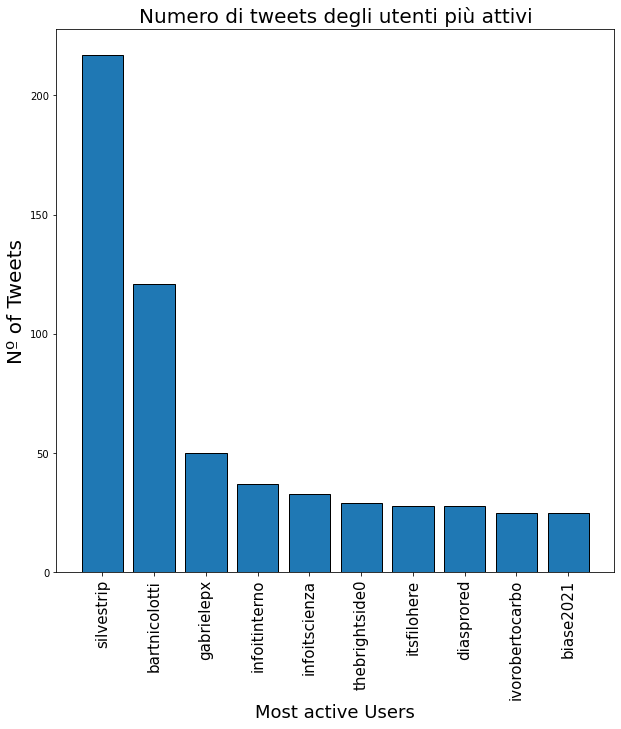

In [42]:
usertweets = df_final.groupby('username')
#Taking the top 25 tweeting users
top_users = usertweets.count()['tweet'].sort_values(ascending = False)[:10]
top_users_dict = top_users.to_dict()
user_ordered_dict =sorted(top_users_dict.items(), key=lambda x:x[1])
user_ordered_dict = user_ordered_dict[::-1]
#Now, like in the previous hashtags and mention cases, going to make #two lists, one with the username and one with the value
dict_values = []
dict_keys = []
for item in user_ordered_dict[0:10]:
    dict_keys.append(item[0])
    dict_values.append(item[1])
fig = plt.figure(figsize = (10,10))
index = np.arange(10)
plt.bar(index, dict_values, edgecolor = 'black', linewidth=1, color = '#1f78b4')
plt.xlabel('Most active Users', fontsize = 18)
plt.ylabel('Nº of Tweets', fontsize=20)
plt.xticks(index,dict_keys, fontsize=15, rotation=90)
plt.title('Numero di tweets degli utenti più attivi', fontsize = 20)
plt.savefig('img/Tweets_of_10_active_users_df_finale.jpg')
plt.show()

**Numero di Tweets con hashtags più utilizzati**

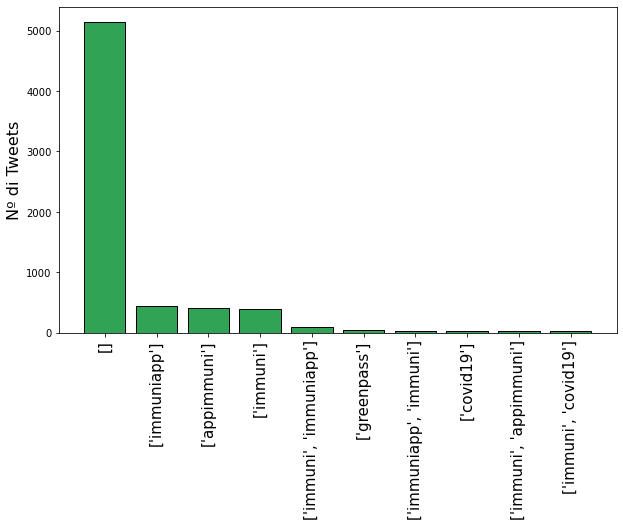

In [43]:
hashtweets = df_final.groupby('hashtags')
#Taking the top 25 tweeting users
top_users = hashtweets.count()['tweet'].sort_values(ascending = False)[:10]
top_users_dict = top_users.to_dict()
user_ordered_dict =sorted(top_users_dict.items(), key=lambda x:x[1])
user_ordered_dict = user_ordered_dict[::-1]
#Now, like in the previous hashtags and mention cases, going to make #two lists, one with the username and one with the value
dict_values = []
dict_keys = []
for item in user_ordered_dict[0:10]:
    dict_keys.append(item[0])
    dict_values.append(item[1])
fig = plt.figure(figsize = (10,6))
index = np.arange(10)
plt.bar(index, dict_values, edgecolor = 'black', color = '#31a354', linewidth=1)
#plt.xlabel('Hashtags più utilizzati', fontsize = 18)
plt.ylabel('Nº di Tweets', fontsize=16)
plt.xticks(index,dict_keys, fontsize=15, rotation=90)
#plt.title('Numero di tweets degli hashtags più utilizzati (top 5)', fontsize = 20)
plt.savefig('img/tweet_hashtags_piu_utilizzati_df_finale_10.jpg')
plt.show()

In [44]:
df_final

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,hashtag_count,ment_count
0,2020-06-04,266910319,appleforyou83,Theappleforyou,immuni app contenere contagi covid fase vers,[],0,0,0,[],[],0,0
1,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,valà piergianfranco lotta privacy chissà azion...,[],1,0,0,[],[],0,0
2,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,scaricate app immuni serve governo tracciarci ...,[],1,0,4,[],[],0,0
3,2020-06-04,1267957495324172288,aleessi4m,alessia ✨,diegofusaro scusa attimo tieni così tanto priv...,[],0,0,1,[],"[{'screen_name': 'DiegoFusaro', 'name': 'Diego...",0,1
4,2020-06-04,1337280565,garboek,GabryKeegan,qualcuno adotti bambino appimmu,[],0,0,2,['appimmuni'],[],1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12978,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,giorgiameloni belpietrotweet giusto rendiamo o...,"[{'screen_name': 'immuni_app', 'name': 'immuni...",0,0,0,"['immuniapp', 'contattostretto', 'positivo']","[{'screen_name': 'GiorgiaMeloni', 'name': 'Gio...",3,3
12979,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,update greenpass zoneacolori restrizioni lockd...,[],0,0,0,"['greenpass', 'zoneacolori', 'restrizioni', 'l...",[],15,0
12980,2021-08-08,1006624848272154624,grossofanken,grossofanken,bel cashback ogni esibizione scaricato esclusi...,[],1,0,0,"['cashback', 'greenpassobbligatorio', 'immunia...",[],3,0
12981,2021-08-29,1260497008986652678,lorech__,Lore,dino sbonaccini vede differenza problema grave...,[],3,0,3,[],"[{'screen_name': 'Dino53084186', 'name': 'Dino...",0,2


-----

Salvo il df in formato csv

In [45]:
df_final.to_csv('dati/df_finale_2020_2021.csv')